### 1. Importing the Dataset

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("house_price_prediction_PR2.csv")

### 2. Total Number of observations in data

In [5]:
data.shape

(5012, 7)

### 3. Independent Variables

In [6]:
data

,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price,address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
5007,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
5008,NaN,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
5009,NaN,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
5010,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


##### Here in this particular dataset, the address of the house is the independent varibale as it is not correlated to any other variable. 

### 4. Correlation and De

In [7]:
data.corr()

,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price
avg_income,1.000000,-0.002213,-0.010668,0.020911,-0.015741,0.640293
avg_area_house_age,-0.002213,1.000000,-0.012728,0.003275,-0.018932,0.451340
avg_area_num_rooms,-0.010668,-0.012728,1.000000,0.462889,0.001966,0.334151
avg_bedrooms,0.020911,0.003275,0.462889,1.000000,-0.021321,0.170628
avg_population,-0.015741,-0.018932,0.001966,-0.021321,1.000000,0.409306
price,0.640293,0.451340,0.334151,0.170628,0.409306,1.000000


##### Here every variable has a positive correlation coefficient with the target variable ( price ), except the address of the house as it is not a numberic data. Therefore address is the independent variable and other all are dependent variables.

### 5. Implementing Linear Regression using Ordinary Least Square (OLS) Method

In [18]:
import statsmodels.api as sm

In [23]:
y = data['price'] ## Dependent Variable
x = data['avg_bedrooms'] ## Independent Variable

x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model

In [24]:
lm.predict(x)

0       1.237214e+06
1       1.188408e+06
2       1.287972e+06
3       1.196705e+06
4       1.244047e+06
            ...     
5007    1.206466e+06
5008    1.233797e+06
5009    1.141555e+06
5010    1.303101e+06
5011    1.236238e+06
Length: 5012, dtype: float64

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     150.2
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           4.72e-34
Time:                        11:04:28   Log-Likelihood:                -71061.
No. Observations:                5012   AIC:                         1.421e+05
Df Residuals:                    5010   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.038e+06   1.66e+04     62.507      0.000    1.01e+06    1.07e+06
avg_bedrooms  4.881e+04   3981.858     12.257      0.000     4.1e+04    5.66e+04
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.821
Skew:                           0.005   Prob(JB):                        0.663
Kurtosis:                       2.938   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# const Coeeficient = 1.038e+06
# avg_bedrooms Coefficient = 4.881e+04
# Linear Equation = y = ax + b

y_pred = 4.881e+04 * x['avg_bedrooms'] + 1.038e+06

### 6. Plotting the above model

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

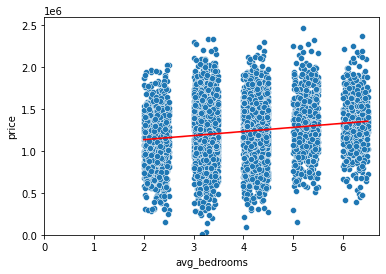

In [30]:
# plotting the data points
sns.scatterplot(x=x['avg_bedrooms'], y=y)

#plotting the line
sns.lineplot(x=x['avg_bedrooms'],y=y_pred, color='red')

#axes
plt.xlim(0)
plt.ylim(0)
plt.show()